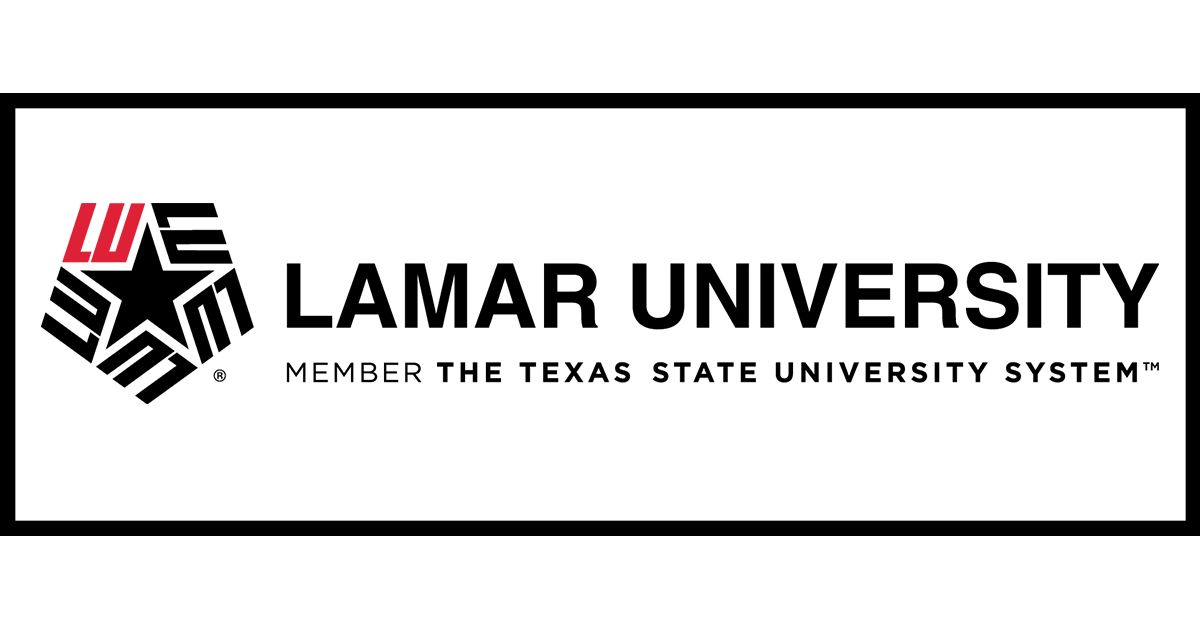

<center> <h1> <font color='blue'> Texas Land Cover Classification<font> </h1> </center>

<p> Data source :</p>
<p>https://data.tnris.org/collection?c=97a6ce2e-8a4c-4570-a3ed-983ef1a4554b#5.06/31.32/-100.08 </p>
<p> Class-Legend-Description: </p>
<p>https://www.mrlc.gov/data/legends/national-land-cover-database-class-legend-and-description </p>

<p>Importing Libraries</p>

In [61]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

<p>Open the image</p>

In [62]:
ds = gdal.Open("C:\\Users\\14098\\Downloads\\NCLD\\nlcd_2019_land_cover_l48_20210604_TX.img")

<p>Find out the type of image </p>

In [63]:
type(ds)

osgeo.gdal.Dataset

<p> Get projection and find out the number of rows, columns and bands </p>

In [64]:
print("Projection: ", ds.GetProjection()) 
print("Columns:", ds.RasterXSize) 
print("Rows:", ds.RasterYSize) 
print("Band count:", ds.RasterCount) 

Projection:  PROJCS["WGS_1984_Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Columns: 44254
Rows: 41260
Band count: 1


<p>Converting from map to pixel coordinates </p>

In [93]:
gt = ds.GetGeoTransform()

<p>Read the raster data as array and display array</p>

In [66]:
band = ds.GetRasterBand(1)
array = band.ReadAsArray()

In [67]:
array

array([[-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       ...,
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128]], dtype=int8)

<p> Finding all the unique values in the array</p>

In [68]:
R = np.unique(array)
R

array([-128,    0,   11,   21,   22,   23,   24,   31,   41,   42,   43,
         52,   71,   81,   82,   90,   95], dtype=int8)

<p> Finding the count of total land cover in texas </p>

In [69]:
A = np.count_nonzero((array!=0) | (array!=-128))

In [70]:
A

1825920040

<p> Multiplying count with the grid cell size to get the total area of land cover in Texas </p>


In [80]:
area = A*30*30*(3.861e-7)
area  #Area of land cover in Texas

634488.9546996

<p>Finding the number of cells having cropland and pasture/hay</p>

In [81]:
B = np.count_nonzero((array==81) | (array==82))
B

170300278

<p> Multiplying with the grid cell size to get the area of cultivable land and pastures in Texas in square miles </p>

In [85]:
area1 = B*30*30*(3.861e-7)

In [86]:
area1 #Area of cultivated land and pastures

59177.64360222

<p>  Percentage of cropland and pasture in Texas </p>

In [90]:

Area2 = (area1/area)*100
Area2


9.326820138301347

<p> Plot the area of the cultivated land along with pastures </p>

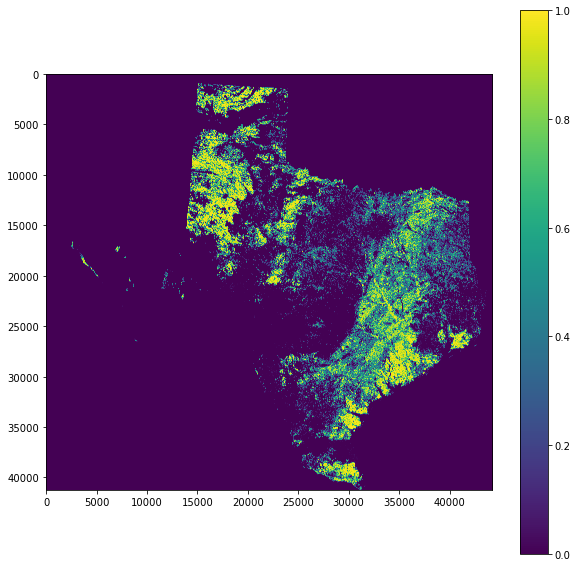

In [92]:
plt.figure(figsize=(10, 10))
plt.imshow((array==81) | (array==82) )
plt.colorbar()


<p> Obtaining the unique cell number along with its total count </P>

In [25]:
same_no = np.unique(array, return_counts=True)
same_no

(array([-128,    0,   11,   21,   22,   23,   24,   31,   41,   42,   43,
          52,   71,   81,   82,   90,   95], dtype=int8),
 array([1056888156,      25309,   15573948,   18541073,   13047785,
           9949312,    4068238,    2544742,   20376221,   43194921,
          16010402,  314749431,  110764265,   75432950,   94867328,
          21397702,    8488257], dtype=int64))

<p> Taking the unique number and its count and making them list </p>

In [26]:
x = same_no[0][2:17].tolist()
y = same_no[1][2:17].tolist()

In [28]:
x

[11, 21, 22, 23, 24, 31, 41, 42, 43, 52, 71, 81, 82, 90, 95]

In [29]:
y

[15573948,
 18541073,
 13047785,
 9949312,
 4068238,
 2544742,
 20376221,
 43194921,
 16010402,
 314749431,
 110764265,
 75432950,
 94867328,
 21397702,
 8488257]

<p> Looping for all areas</p>

In [37]:
all_15 = []
for n in y:
    result = n*30*30*3.86*10e-7
    all_15.append(result)

In [38]:
all_15

[54103.895352,
 64411.687602,
 45328.00509,
 34563.909888,
 14133.058812,
 8840.433708,
 70786.991754,
 150059.155554,
 55620.136547999995,
 1093439.523294,
 384795.05660999997,
 262054.06829999998,
 329569.097472,
 74335.616748,
 29488.204818]

<p> Bar graph of area of all classes of land cover in Texas </p>

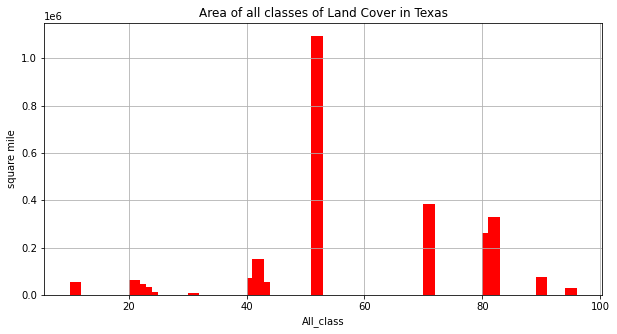

In [57]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x,all_15, color ='r', width = 2)
plt.xlabel('All_class')
plt.ylabel("square mile")
plt.title("Area of all classes of Land Cover in Texas")
plt.grid()
plt.show()